In [1]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

Loading required package: behavr



In [2]:
data <- data.table::fread(file = "tidy_data_wide.csv")

In [3]:
experiments <- c("24hr LTM")
wild_types <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
data <- data[(experiment %in% experiments & Genotype %in% wild_types & Training == "6X_Spaced"),]
panel5_data <-data[region_id!="NONE",]

In [4]:
unique(panel5_data$interval)

[1] "NONE"      "ZT05-ZT24" "ZT12-ZT18" "ZT05-ZT11"

In [5]:
intervals <- c("NONE", "ZT05-ZT11", "ZT12-ZT18", "ZT05-ZT24")
panel5_data[, interval := factor(interval, levels=intervals)]

In [6]:
A <- panel5_data[interval=="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel5_data[interval=="ZT05-ZT11",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel5_data[interval=="ZT12-ZT18",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel5_data[interval=="ZT05-ZT24",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
X <- Cbind(Ad, Bd, Cd, Dd)
colnames(X) <- intervals
print(paste(
    nrow(A),
    nrow(B),
    nrow(C),
    nrow(D)  
))

[1] "25 26 25 12"


In [7]:
data.table::fwrite(x = A, file="prism/Fig5/Figure_5_NO_SD.csv")
data.table::fwrite(x = B, file="prism/Fig5/Figure_5_ZT05-ZT11.csv")
data.table::fwrite(x = C, file="prism/Fig5/Figure_5_ZT12-ZT18.csv")
data.table::fwrite(x = D, file="prism/Fig5/Figure_5_ZT05-ZT24.csv")
data.table::fwrite(x = X, file="prism/Fig5/Figure_5_boxplot.csv")

In [8]:
panel5_data_long <- melt(panel5_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [9]:
panel5_data_long[Genotype=="Iso31" & test == "POST", .N, by=interval]

interval,N
<fct>,<int>
NONE,25
ZT05-ZT24,12
ZT12-ZT18,25
ZT05-ZT11,26


[1] -1.02  0.75
[1] 0.55


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars  N test           PI    PI_median
1:      NONE        0.5      0.0033   *** 50  PRE  0.026904762  0.000000000
2:      NONE        0.5      0.0033   *** 50 POST -0.125631746 -0.083333333
3: ZT05-ZT11        0.5      0.2249    NS 52  PRE -0.037959263 -0.007936508
4: ZT05-ZT11        0.5      0.2249    NS 52 POST -0.058730159 -0.085714286
5: ZT12-ZT18        0.5      0.0555    NS 50  PRE -0.016509380  0.000000000
6: ZT12-ZT18        0.5      0.0555    NS 50 POST -0.108571429 -0.071428571
7: ZT05-ZT24        0.5      0.0544    NS 24  PRE -0.001406926  0.000000000
8: ZT05-ZT24        0.5      0.0544    NS 24 POST -0.098908730 -0.095833333
       PI_std   std_error x
1: 0.08387187 0.011861274 1
2: 0.23692860 0.033506764 2
3: 0.07582726 0.010515350 1
4: 0.14670291 0.020344033 2
5: 0.06906705 0.009767556 1
6: 0.26228818 0.037093150 2
7: 0.08848256 0.018061426 1
8: 0.18566118 0.037897929 2


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

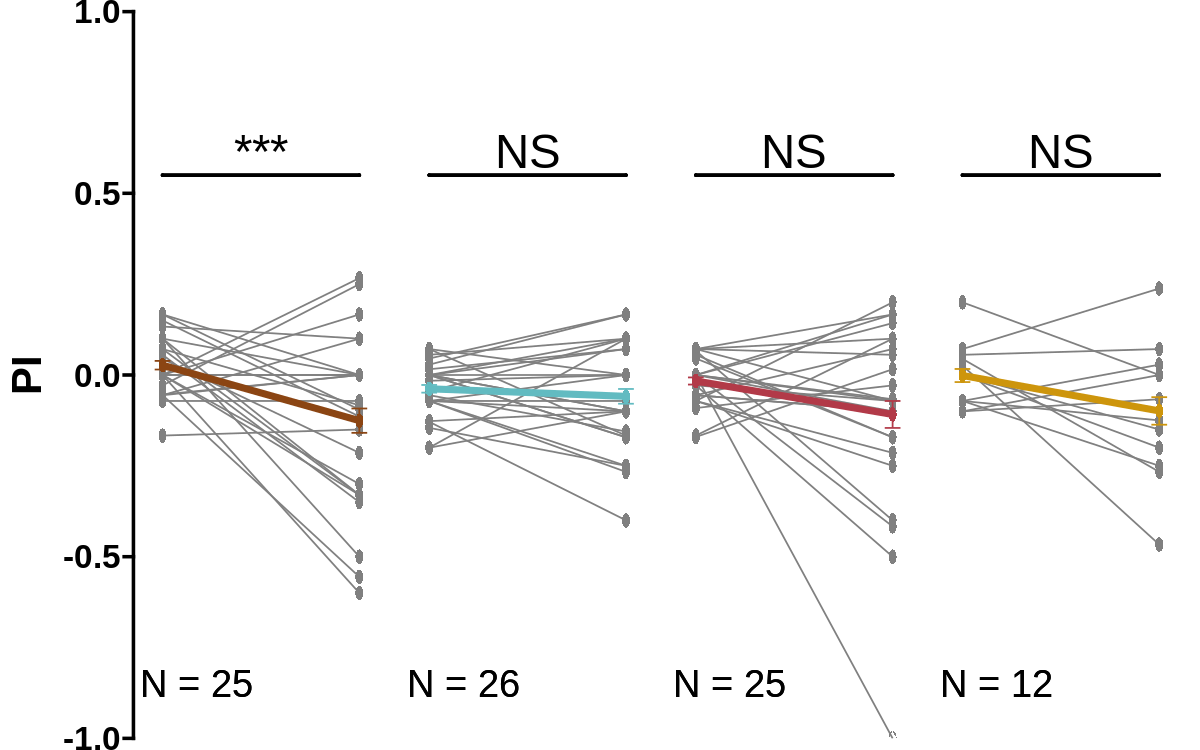

In [10]:
ratio=2.5
size_unit=2.5
panel5 <- learning_plot(
    panel5_data_long, "interval",
    map_signif_level=TRUE, test=paired_t_test,
    colors=colors_panel5[c(1,2,3, 4)], starsize=10,
    y_annotation=0.55, textsize=8,
    y_limits=c(-1, 0.75),
    hjust_text=0.2
)
options(repr.plot.width=size_unit*panel5$n_facets, repr.plot.height=size_unit*ratio)
panel5
save_learning_plot(plot=panel5, filename = "figures/panel5A.svg", ratio=ratio, size_unit = size_unit)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


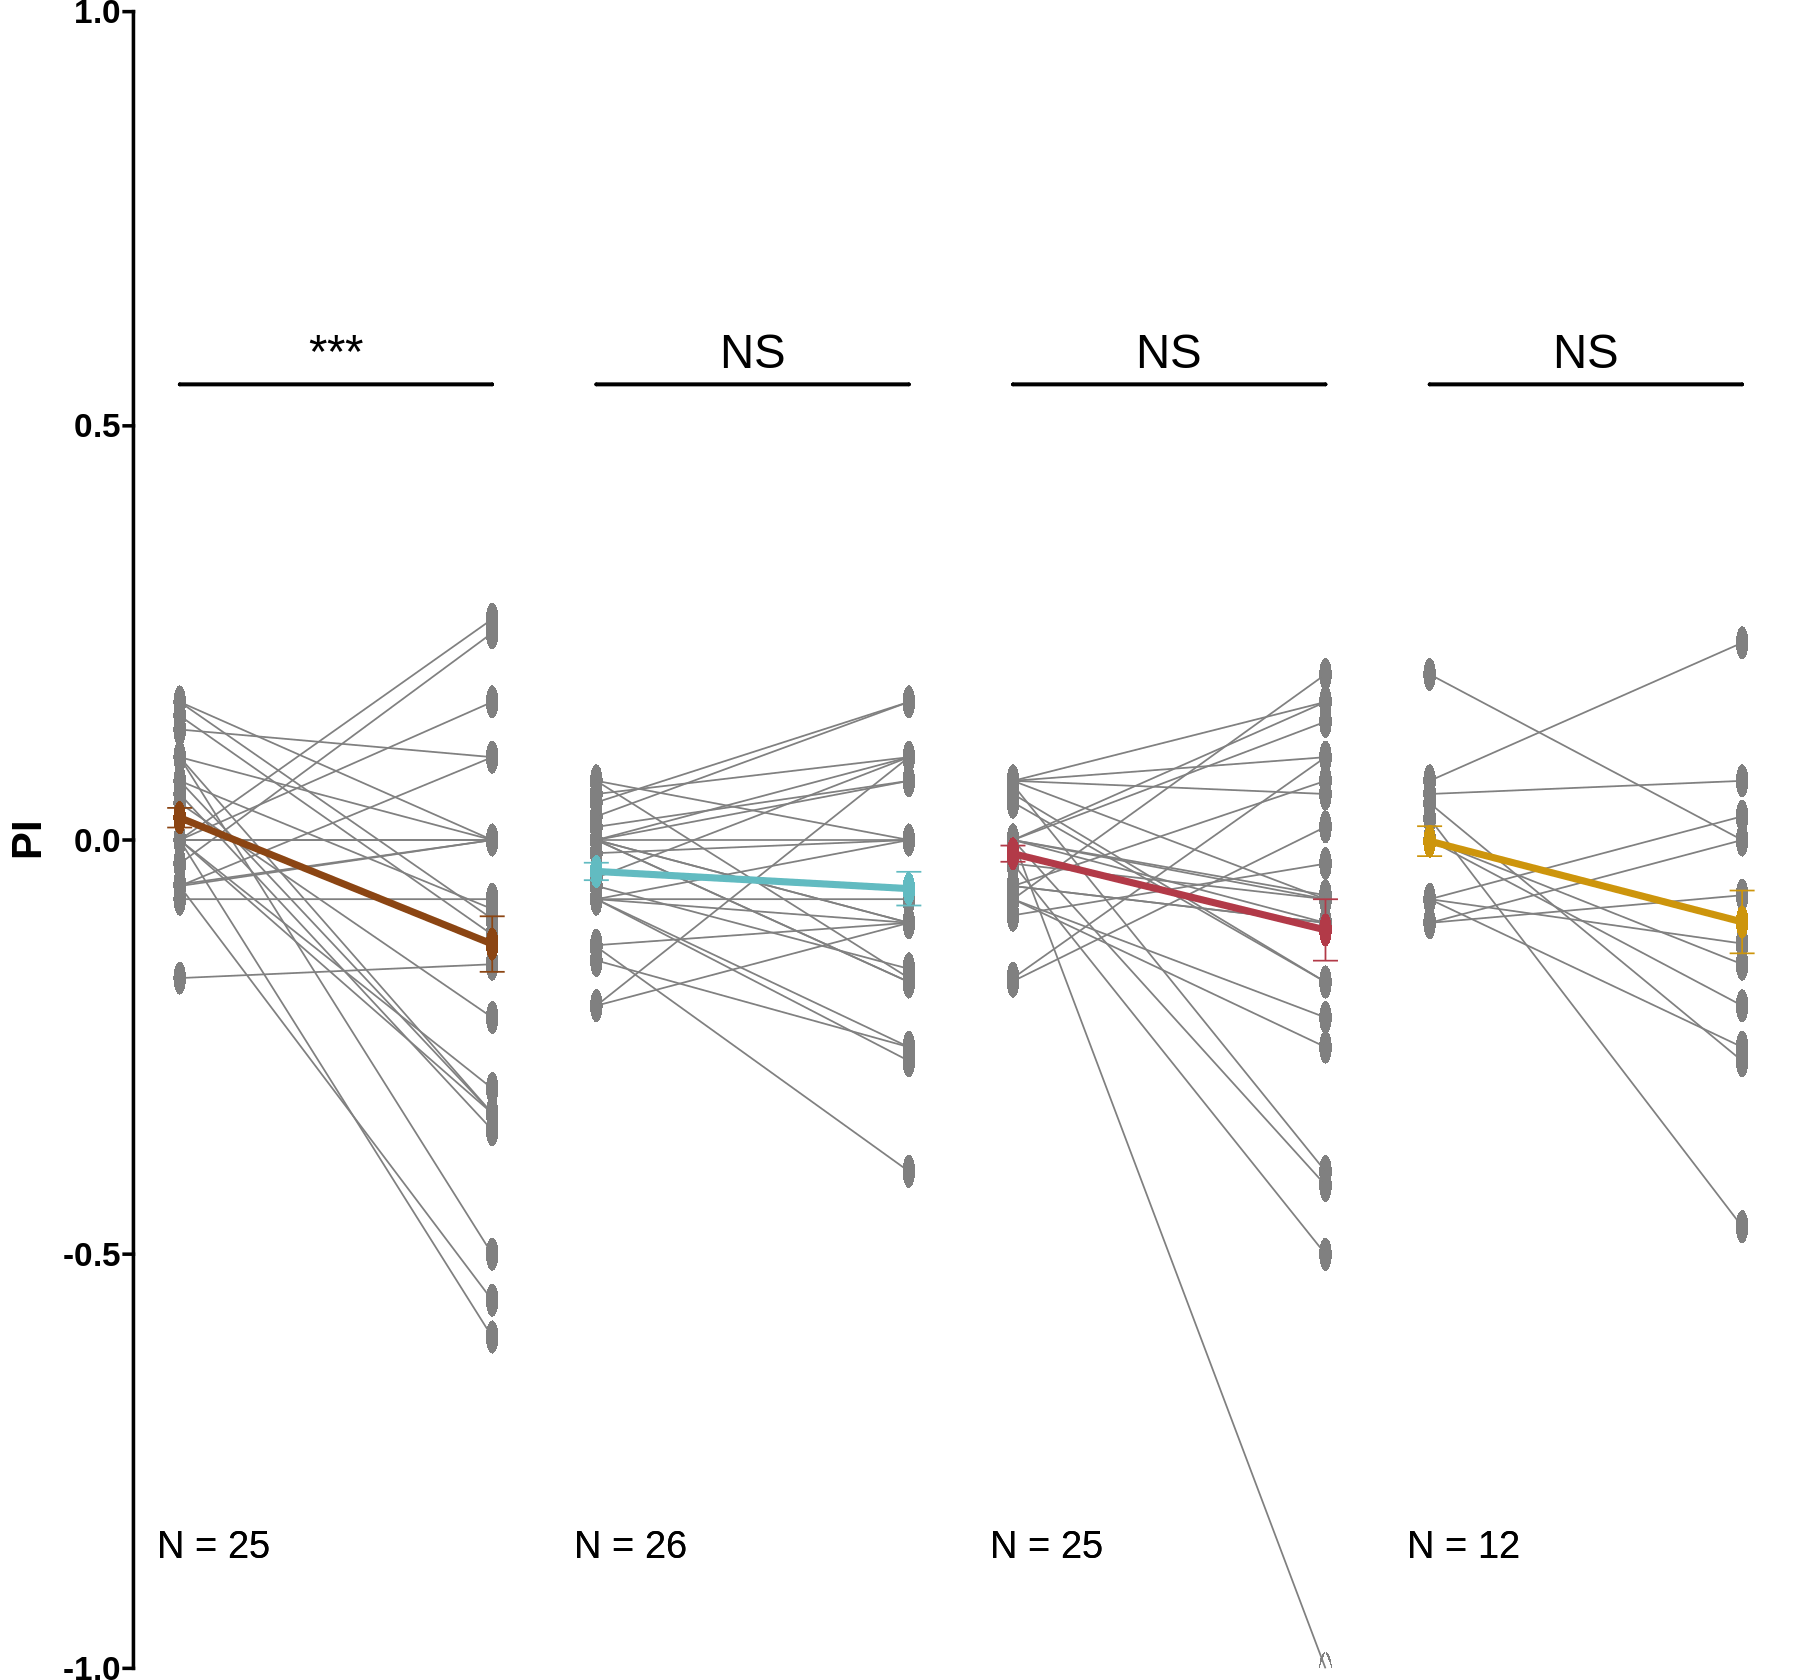

In [17]:
panel5$gg

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
    id   group__         PRE       POST        dPI outlier
1: 568 ZT05-ZT24  0.07142857  0.2380952  0.1666667    TRUE
2: 585 ZT05-ZT24  0.02597403 -0.4666667 -0.4926407    TRUE
3: 600 ZT05-ZT11 -0.12878788 -0.4000000 -0.2712121    TRUE
4: 603 ZT05-ZT11 -0.20000000  0.1000000  0.3000000    TRUE
5: 632 ZT12-ZT18  0.00000000 -1.0000000 -1.0000000    TRUE
6: 643 ZT12-ZT18 -0.07142857  0.2000000  0.2714286    TRUE
7: 651      NONE -0.02857143  0.2500000  0.2785714    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 4


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

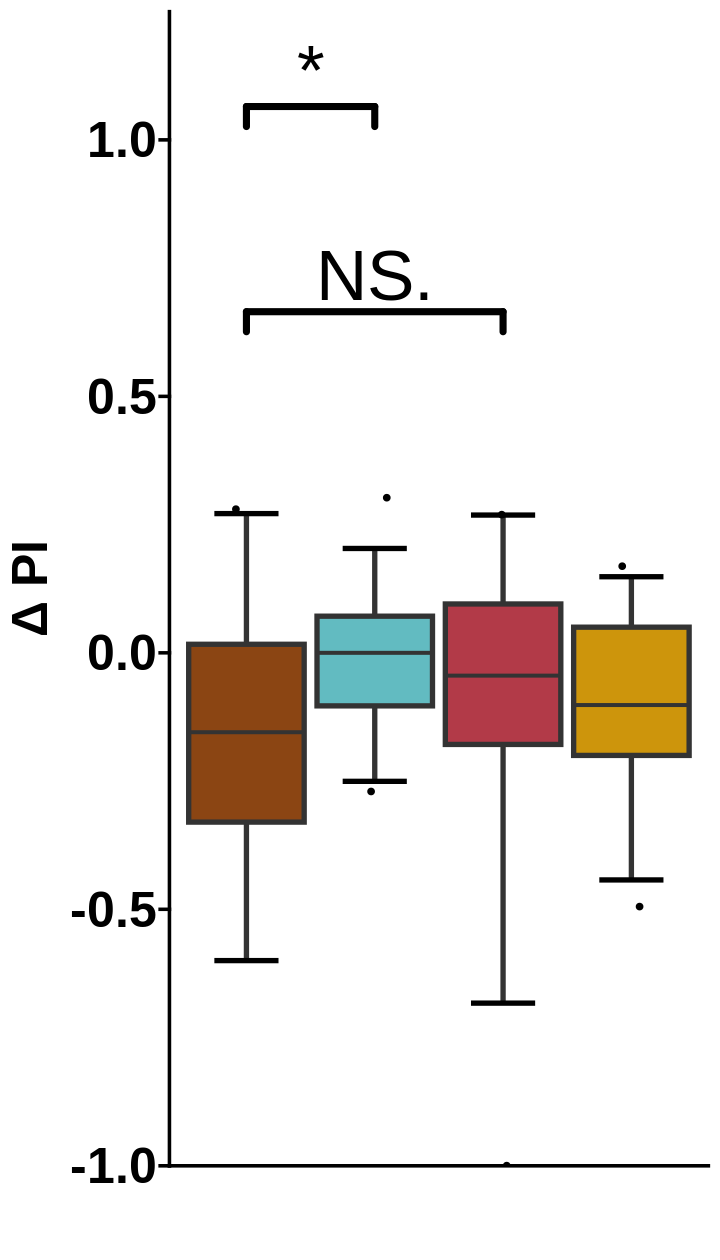

In [11]:
size_unit=1.5
ratio=7
panel5B <- summary_plot(
    data=panel5_data_long, "interval",
    comparisons=list(
        # c("ZT05-ZT11", "ZT12-ZT18"),
        # c("ZT12-ZT18", "No SD"),
        c("ZT05-ZT11", "NONE"),
        c("ZT12-ZT18", "NONE")
    ),
    annotation_y=c(1, 0.6),
    test=unpaired_t_test,
    colors=colors_panel5[c(1,2,3,4)],
    y_limits=c(-1, 1.25),
    text_y_size=30,
    title_y_size=30,
    percentile=c(0.025, 0.975)
)

panel5B$gg <- panel5B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank()
)
options(repr.plot.width=size_unit*panel5B$n_facets, repr.plot.height=size_unit*ratio)
panel5B
save_summ_plot(plot=panel5B, filename = "figures/panel5B.svg", ratio=ratio, size_unit = size_unit)

In [16]:
getwd()

[1] "/home/vibflysleep/FlySleepLab_Dropbox/Antonio/FSLLab/Projects/IDOC/paper"

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in grid.Call(C_textBounds, as.graphi

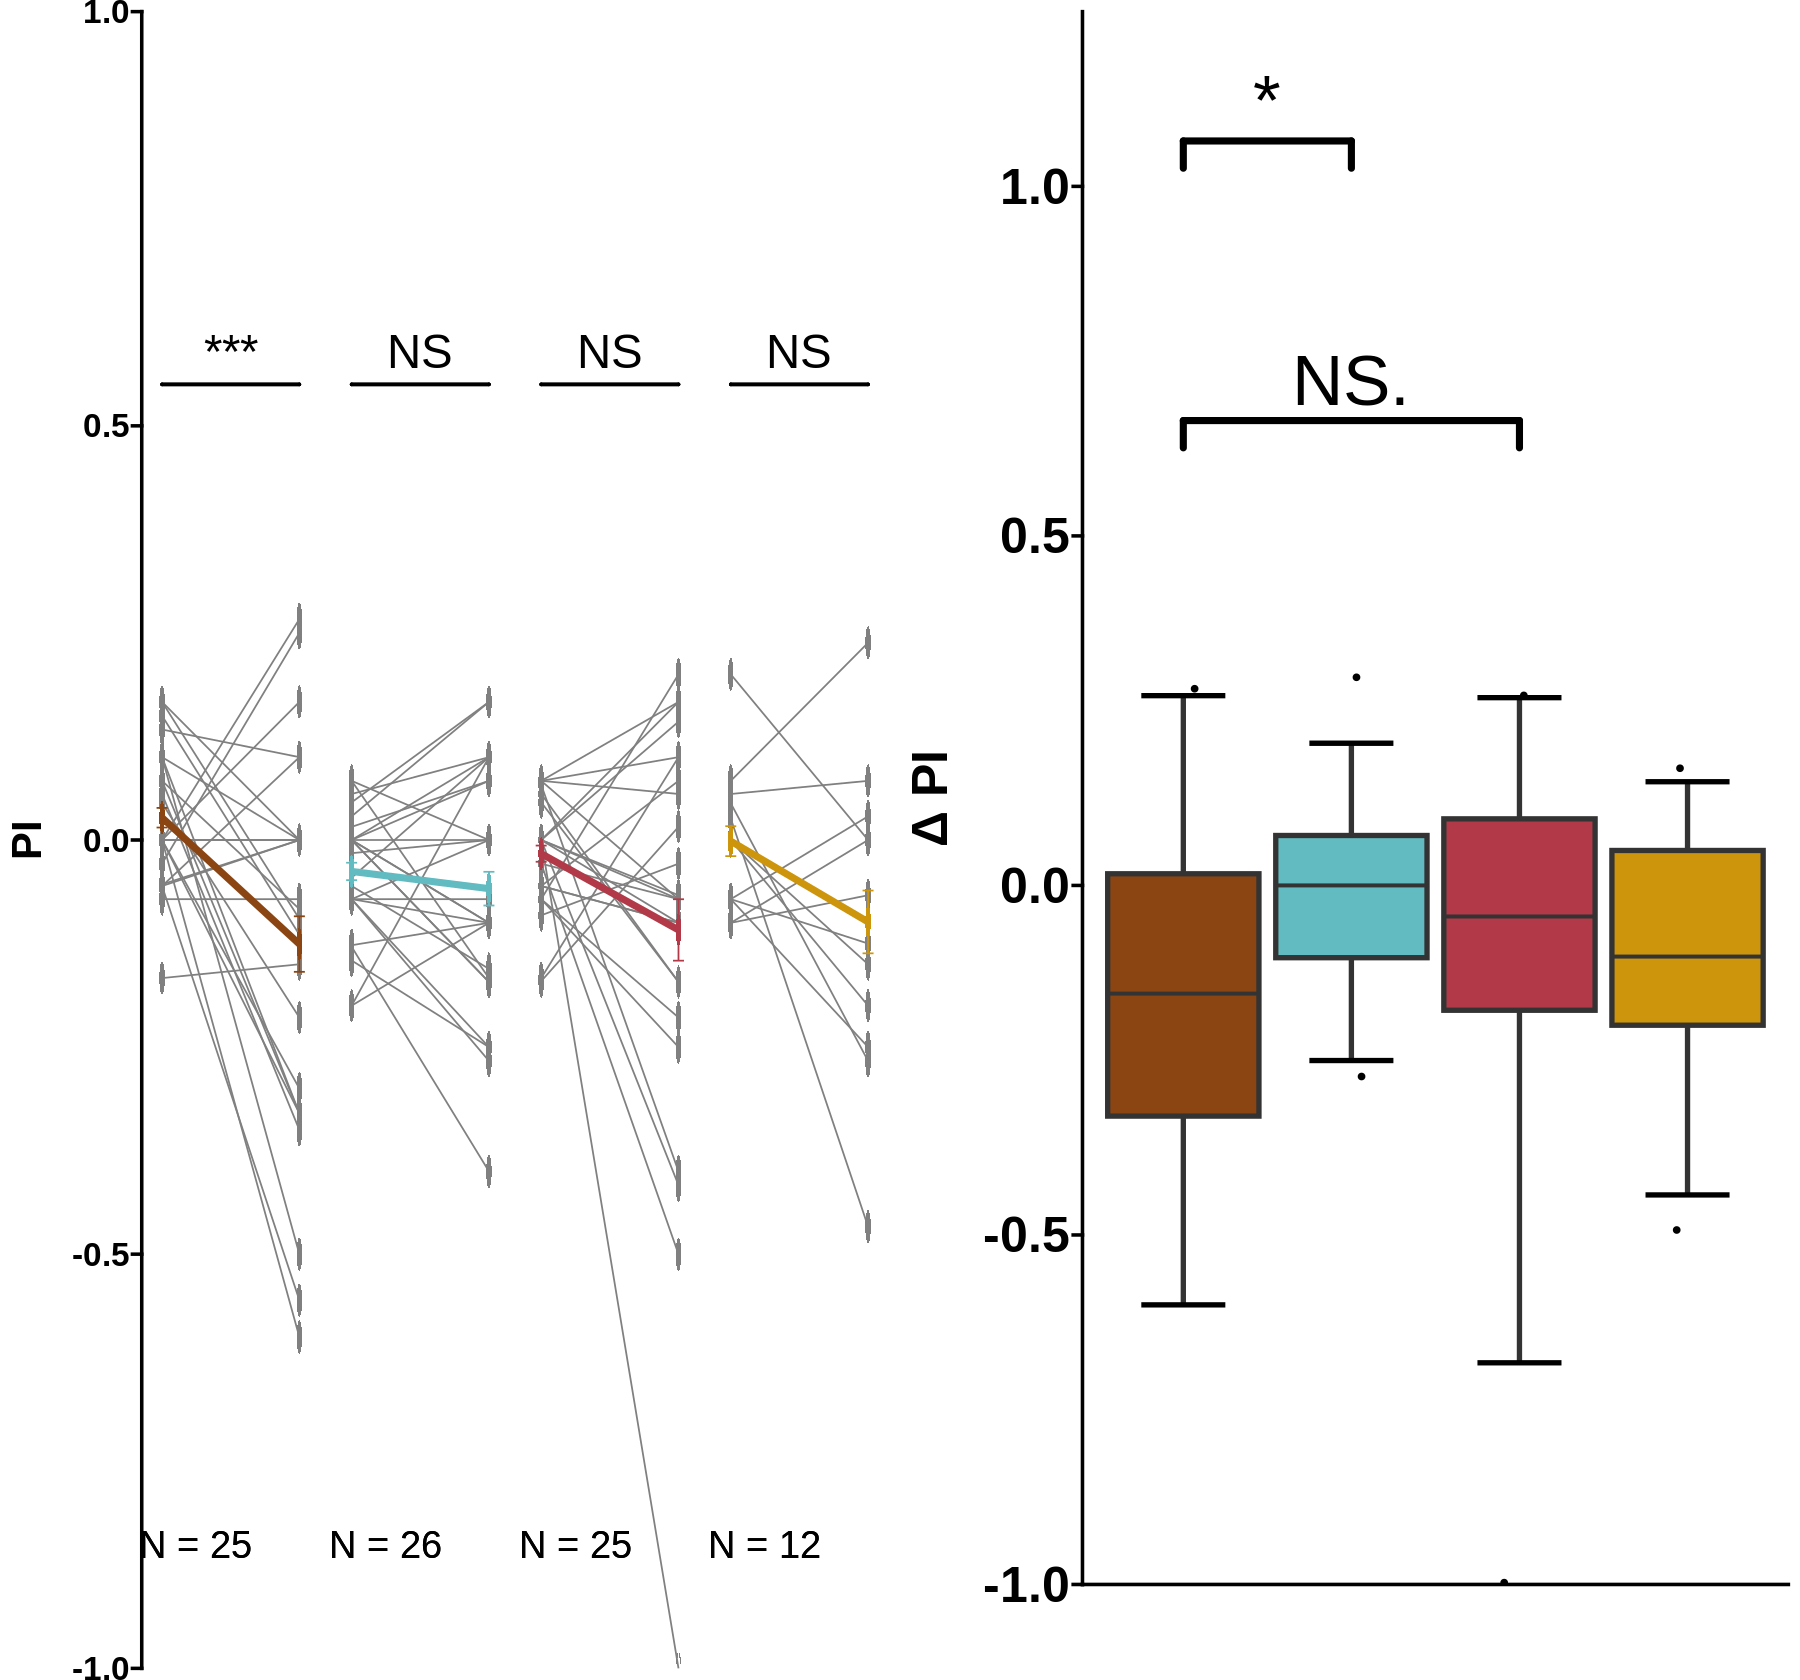

In [12]:
options(repr.plot.width=15)
options(repr.plot.height=14)
gg <- cowplot::plot_grid(
    panel5$gg, panel5B$gg,
    ncol=2
)
ggsave(plot = gg, filename = "figures/Figure_5.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg